In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
# features (1 sim, 0 não)
# perna longo?
# perna curta?
# faz auau?


obj = {'Perna longa?' : [0,0,0,1,1,1],
       'Perna Curta?' : [1,1,1,0,1,1],
       'Faz AuAu?'    : [0,1,1,1,0,1],
       'Animal'       : [1,1,1,0,0,0]
      }

#1 = porco 0 = cachorro
#x = [[0,1,0],[0,1,1],[0,1,1],[1,0,1],[1,1,0],[1,1,1]]
#y = [1,1,1,0,0,0]

df = pd.DataFrame(obj)
df


,Perna longa?,Perna Curta?,Faz AuAu?,Animal
0,0,1,0,1
1,0,1,1,1
2,0,1,1,1
3,1,0,1,0
4,1,1,0,0
5,1,1,1,0


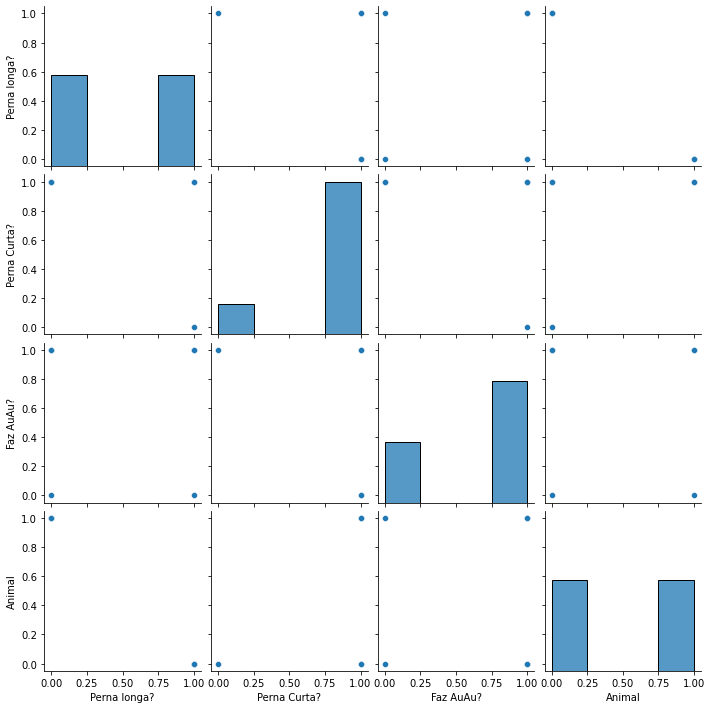

In [41]:
sns.pairplot(df)

In [44]:
from sklearn.svm import LinearSVC

x = df[['Perna longa?','Perna Curta?','Faz AuAu?']]
y = df['Animal']
model = LinearSVC()
model.fit(x,y)

LinearSVC()

In [46]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0], dtype=int64)

In [47]:
x_test= [[1,1,1],[1,1,0],[0,1,1]]

previsoes = model.predict(x_test)
print(previsoes)

[0 0 1]


In [48]:
testes_classes = [0,1,1]

In [49]:
corretos = (previsoes == testes_classes).sum()
total = len(x_test)
taxaAcerto = corretos / total
print("taxa de acerto: ", round(taxaAcerto *100,2) , "%")

taxa de acerto:  66.67 %


In [50]:
from sklearn.metrics import accuracy_score
taxa_de_acerto = accuracy_score(testes_classes, previsoes)
print("taxa de acerto: ", round(taxa_de_acerto *100,2) , "%")

taxa de acerto:  66.67 %


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

model.fit(x_train,y_train)

LinearSVC()

In [58]:
model.coef_

array([[-1.06329912,  0.43038814,  0.43038582]])

In [59]:
predição = model.predict(x_test)
predição

array([1, 0], dtype=int64)

Text(0, 0.5, 'Animal Estimado')

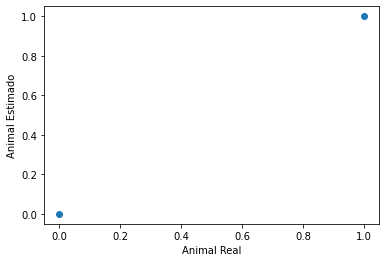

In [62]:
plt.scatter(y_test,predição)
plt.xlabel('Animal Real')
plt.ylabel('Animal Estimado')

In [64]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predição))
print('MSE:', metrics.mean_squared_error(y_test, predição))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predição)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0
